--- 
# Part 4: Post Hoc Analysis and Customer Insights

This notebook includes a post hoc analysis of the 6 clusters in order to build customer personas for each of the segments to be used for marketing and promotional purposes. 

--- 

# Contents
- [Post Hoc Analysis](#Post-Hoc-Analysis)
    - [RFM Scores per Cluster](#RFM-Scores-per-Cluster)
    - [Demographics per Cluster](#Demographics-per-Cluster)
    - [Membership Length per Cluster](#Membership-Length-per-Cluster)
    - [Amount Spent with Number of Transactions per Cluster](#Amount-Spent-with-Number-of-Transactions-per-Cluster)
    - [Offer Metrics per Cluster](#Offer-Metrics-per-Cluster)
- [Customer Segment Summaries](#Customer-Segment-Summaries)
- [Conclusions](#Conclusions)

# Import Libraries

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Package used to analyze users
from lifetimes.utils import summary_data_from_transaction_data

# Set a random seed.
np.random.seed(42)

pd.set_option('display.max_rows', None)
#sns.set_palette('Greens_r')
sns.set_palette('Set2')

# Reimport Cleaned & Merged Data

In [95]:
final = pd.read_csv('./data/final_with_clusters.csv')

In [96]:
final.head()

txn_overall  amt_overall  txn_promo  amt_promo  txn_nonpromo  amt_nonpromo  \
0          9.0        20.40        9.0      20.40           0.0          0.00   
1          3.0        77.01        1.0      23.22           2.0         53.79   
2          6.0        14.30        1.0       2.14           5.0         12.16   
3          7.0       159.27        6.0     135.34           1.0         23.93   
4          3.0         4.65        2.0       1.15           1.0          3.50   

   membership_days  age  income  gender_Blank  ...  bogo_response_score  \
0              530   23   56000             1  ...                 0.00   
1              377   55  112000             0  ...                 0.00   
2               15   89   68000             1  ...                 0.00   
3              444   75  100000             0  ...                 0.64   
4              357   82   88000             1  ...                 0.00   

   disc_response_score  info_response_score  rfm_promo_score  \
0                 0.91                 0.00             2.67   
1                 0.00                 0.00             4.67   
2                 0.00                 0.00             3.67   
3                 0.00                 0.92             3.00   
4                 0.00                 0.00             2.33   

   rfm_nonpromo_score  amt_per_hour  amt_per_member_day  amt_per_income  \
0                0.00          0.03                0.04             0.0   
1                4.00          0.11                0.20             0.0   
2                2.33          0.02                0.95             0.0   
3                4.00          0.22                0.36             0.0   
4                3.33          0.01                0.01             0.0   

   cluster  cluster_dbscan  
0        3               0  
1        0               0  
2        0               0  
3        4               0  
4        5               0  

[5 rows x 44 columns]

In [97]:
final.columns

Index(['txn_overall', 'amt_overall', 'txn_promo', 'amt_promo', 'txn_nonpromo',
       'amt_nonpromo', 'membership_days', 'age', 'income', 'gender_Blank',
       'gender_F', 'gender_M', 'gender_O', 'offer_received', 'offer_viewed',
       'offer_completed', 'web', 'email', 'mobile', 'social', 'difficulty',
       'duration', 'reward', 'redeemed_reward', 'response_score',
       'bogo_offer_received', 'disc_offer_received', 'info_offer_received',
       'bogo_offer_viewed', 'disc_offer_viewed', 'info_offer_viewed',
       'bogo_offer_completed', 'disc_offer_completed', 'info_offer_completed',
       'bogo_response_score', 'disc_response_score', 'info_response_score',
       'rfm_promo_score', 'rfm_nonpromo_score', 'amt_per_hour',
       'amt_per_member_day', 'amt_per_income', 'cluster', 'cluster_dbscan'],
      dtype='object')

# Post Hoc Analysis
Cluster Insights & Personas of each Customer Segment

In [98]:
# # Renaming Clusters to be 1-6
# final = final.reset_index(drop=True)
# final['cluster'] = final['cluster'].replace({0:1,1:2,2:3,3:4,4:5, 5:6})

In [99]:
final['cluster'].value_counts(normalize=True)

5    0.265682
0    0.223373
2    0.177827
3    0.160763
4    0.146405
1    0.025950
Name: cluster, dtype: float64

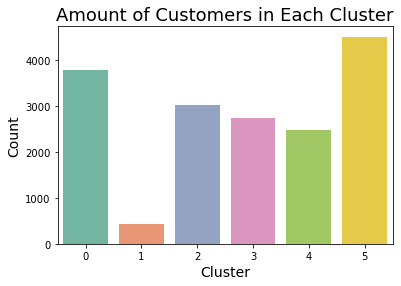

In [100]:
sns.countplot(x=final['cluster'])
plt.title('Amount of Customers in Each Cluster', size = 18)
plt.xlabel('Cluster', size = 14)
plt.ylabel('Count', size = 14);

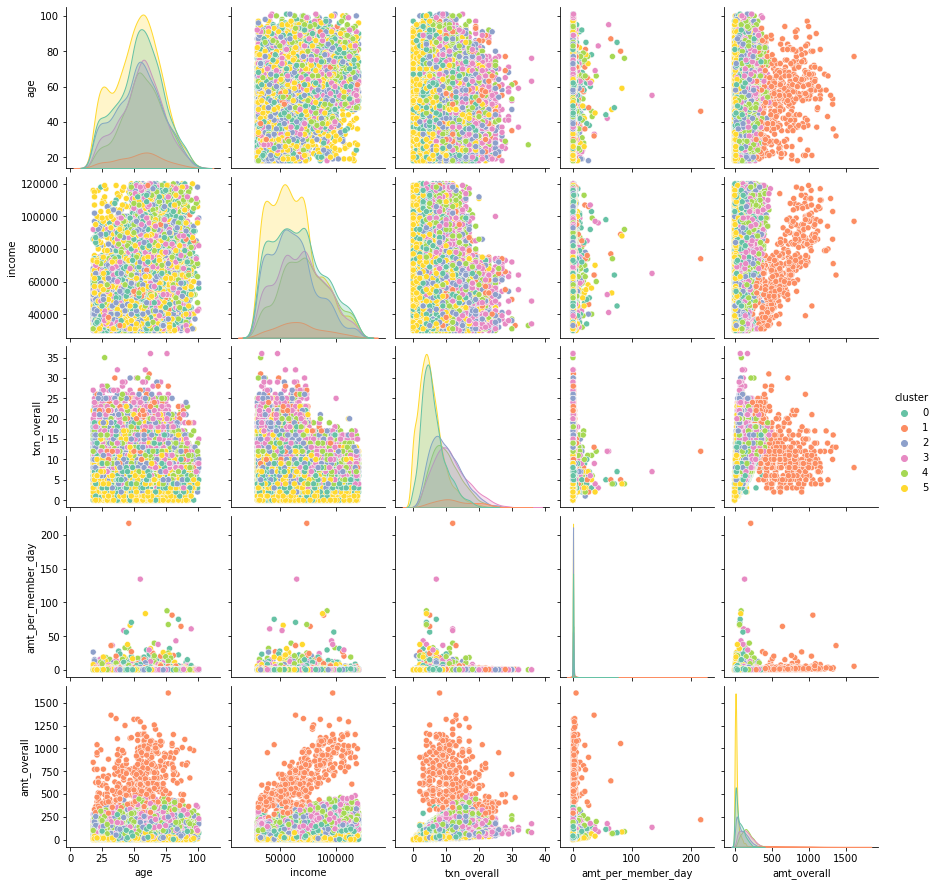

In [101]:
plot_cols = ['age', 'income', 'txn_overall', 'amt_per_member_day', 'amt_overall', 'cluster']
sns.pairplot(final[plot_cols], hue='cluster', palette="Set2");

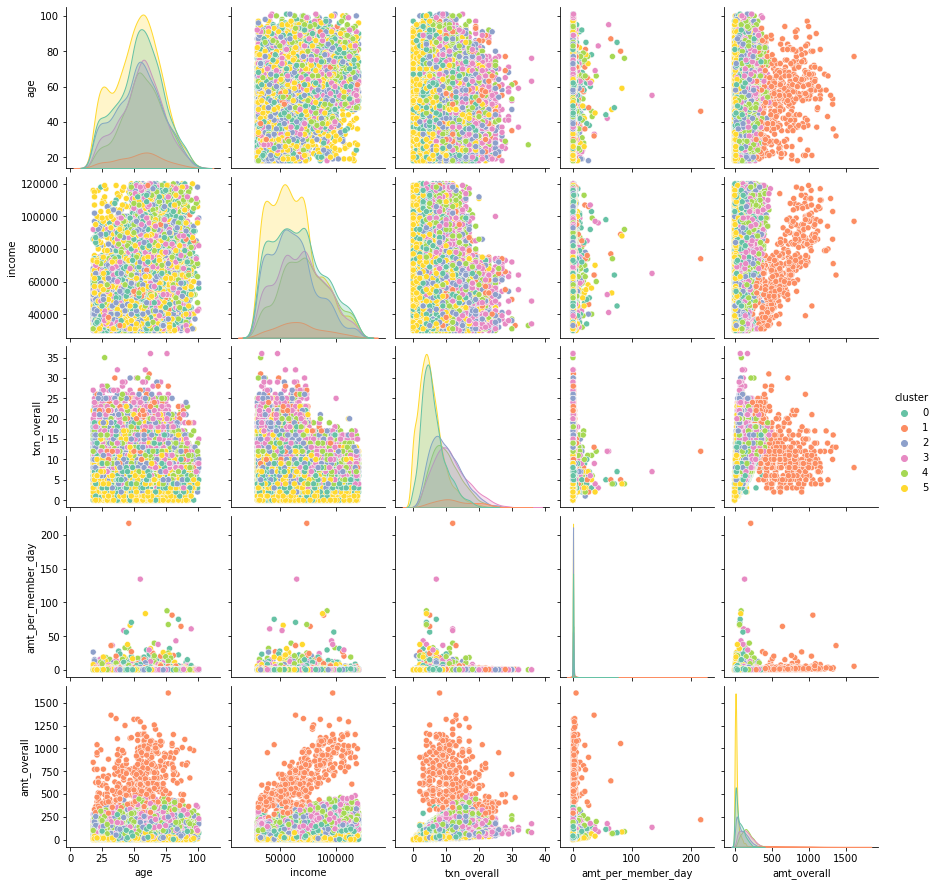

In [102]:
plot_cols = ['age', 'income', 'txn_overall', 'amt_per_member_day', 'amt_overall','cluster']
sns.pairplot(final[plot_cols], hue='cluster', palette="Set2");

## RFM Scores per Cluster

Much higher RFM Scores for all clusters during promotions compared to nonpromos which is to be expected as promos are designed to boost activity. Cluster 5 is the least valuable during both nonpromos and promos and in terms of RFM scores with a mean of 0.95 and 2.59 respectively. The most valuable is Cluster 0 during nonpromos and Cluster 1 during promotions followed by Clusters 0 and 4. Cluster 3 also very low during non-promos.

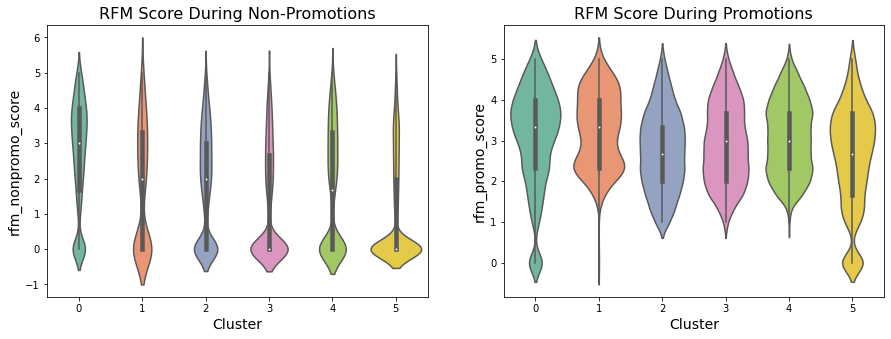

In [103]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.violinplot(data=final, x='cluster', y='rfm_nonpromo_score', ax=ax1)
ax1.set_title('RFM Score During Non-Promotions', size = 16)
ax1.set_xlabel('Cluster', size = 14)
ax1.set_ylabel('rfm_nonpromo_score', size = 14)

sns.violinplot(data=final, x='cluster', y='rfm_promo_score', ax=ax2)
ax2.set_title('RFM Score During Promotions', size = 16)
ax2.set_xlabel('Cluster', size = 14)
ax2.set_ylabel('rfm_promo_score', size = 14)
plt.savefig('./images/rfm_clusters.png');

In [104]:
final.groupby('cluster')['rfm_nonpromo_score', 'rfm_promo_score'].describe()

rfm_nonpromo_score                                                  \
                     count      mean       std  min   25%   50%   75%  max   
cluster                                                                      
0                   3796.0  2.671351  1.534074  0.0  1.67  3.00  4.00  5.0   
1                    441.0  1.737914  1.695390  0.0  0.00  2.00  3.33  5.0   
2                   3022.0  1.816671  1.549790  0.0  0.00  2.00  3.00  5.0   
3                   2732.0  1.220871  1.535622  0.0  0.00  0.00  2.67  5.0   
4                   2488.0  1.683284  1.678021  0.0  0.00  1.67  3.33  5.0   
5                   4515.0  0.947652  1.440087  0.0  0.00  0.00  2.00  5.0   

        rfm_promo_score                                                  
                  count      mean       std  min   25%   50%   75%  max  
cluster                                                                  
0                3796.0  3.085129  1.219669  0.0  2.33  3.33  4.00  5.0  
1                 441.0  3.277800  0.901059  0.0  2.33  3.33  4.00  5.0  
2                3022.0  2.773051  0.966931  1.0  2.00  2.67  3.33  5.0  
3                2732.0  2.928064  0.956009  1.0  2.00  3.00  3.67  5.0  
4                2488.0  3.084502  0.892927  1.0  2.33  3.00  3.67  5.0  
5                4515.0  2.594921  1.256640  0.0  1.67  2.67  3.67  5.0

## Demographics per Cluster

Income and Age have fairly similar distributions among the clusters. Cluster 4 has the highest average (72,228) and median (71,500) income of all the clusters followed by Clusters 3 and 1. Cluster 4 also had the highest average and median age. Cluster 5 had the lowest average and median incomes which correlates to their lower RFM scores, as well as the lowest average age. 

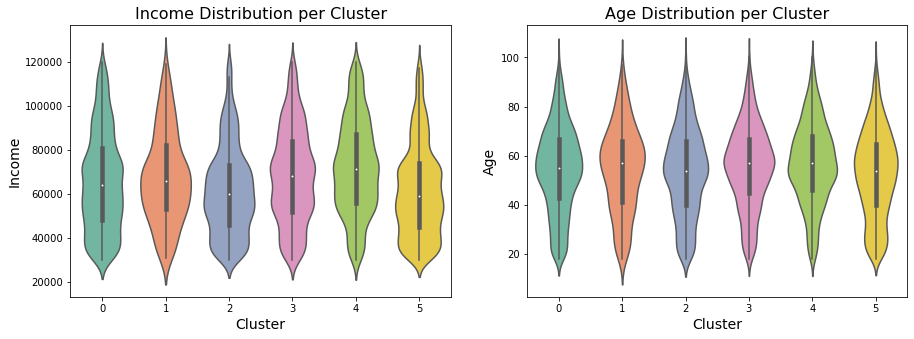

In [127]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.violinplot(data=final, x='cluster', y='income', ax=ax1)
ax1.set_title('Income Distribution per Cluster', size = 16)
ax1.set_xlabel('Cluster', size = 14)
ax1.set_ylabel('Income', size = 14)

sns.violinplot(data=final, x='cluster', y='age', ax=ax2)
ax2.set_title('Age Distribution per Cluster', size = 16)
ax2.set_xlabel('Cluster', size = 14)
ax2.set_ylabel('Age', size = 14)
plt.savefig('./images/income_age_clusters.png');

In [111]:
final.groupby('cluster')['income','age'].describe().T

cluster                   0              1              2              3  \
income count    3796.000000     441.000000    3022.000000    2732.000000   
       mean    65795.837724   67510.204082   61721.376572   68397.877013   
       std     22477.784519   20503.891209   20161.343571   21454.067390   
       min     30000.000000   31000.000000   30000.000000   30000.000000   
       25%     48000.000000   53000.000000   46000.000000   52000.000000   
       50%     64000.000000   66000.000000   60000.000000   68000.000000   
       75%     81000.000000   82000.000000   73000.000000   84000.000000   
       max    120000.000000  119000.000000  120000.000000  120000.000000   
age    count    3796.000000     441.000000    3022.000000    2732.000000   
       mean       54.514752      54.630385      53.477498      55.597731   
       std        17.465661      17.488227      17.860895      16.685855   
       min        18.000000      18.000000      18.000000      18.000000   
       25%        43.000000      41.000000      40.000000      45.000000   
       50%        55.000000      57.000000      54.000000      57.000000   
       75%        67.000000      66.000000      66.000000      67.000000   
       max       101.000000      97.000000     101.000000     101.000000   

cluster                   4              5  
income count    2488.000000    4515.000000  
       mean    72228.295820   61546.622370  
       std     21489.286546   20747.447201  
       min     30000.000000   30000.000000  
       25%     56000.000000   45000.000000  
       50%     71500.000000   59000.000000  
       75%     87000.000000   74000.000000  
       max    120000.000000  120000.000000  
age    count    2488.000000    4515.000000  
       mean       56.840836      52.621705  
       std        16.488435      17.699192  
       min        18.000000      18.000000  
       25%        46.000000      40.000000  
       50%        57.000000      54.000000  
       75%        68.000000      65.000000  
       max       100.000000     100.000000

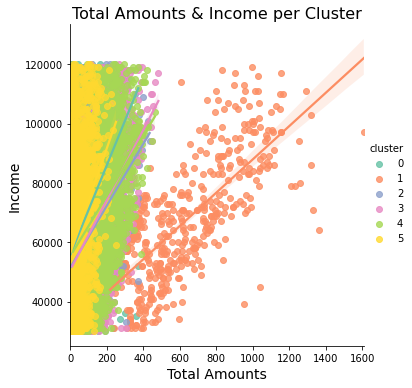

In [106]:
sns.lmplot(x='amt_overall', y='income', hue='cluster', data=final)
plt.title('Total Amounts & Income per Cluster', size = 16)
plt.xlabel('Total Amounts', size = 14)
plt.ylabel('Income', size = 14);

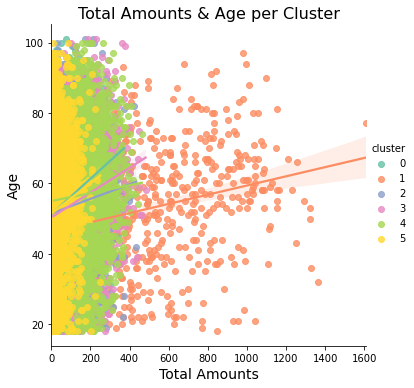

In [107]:
sns.lmplot(x='amt_overall', y='age', hue='cluster', data=final)
plt.title('Total Amounts & Age per Cluster', size = 16)
plt.xlabel('Total Amounts', size = 14)
plt.ylabel('Age', size = 14);

In [108]:
# Un-dummy the gender columns into 1 gender column again
# Reference: https://stackoverflow.com/questions/38334296/reversing-one-hot-encoding-in-pandas
gender = final[['gender_Blank', 'gender_F', 'gender_M', 'gender_O']].copy()
gender.rename({'gender_Blank': 'blank', 'gender_F': 'female', 'gender_M': 'male', 'gender_O': 'other'}, axis =1, inplace=True)
gender['gender'] = ''

for col_name in gender.columns:
    gender.loc[gender[col_name]==1,'gender']= gender['gender']+' '+col_name

gender['gender'].value_counts(normalize=True)

 male      0.499176
 female    0.360421
 blank     0.127928
 other     0.012475
Name: gender, dtype: float64

In [109]:
# Add reconsolidated gender back into final df
final['gender']= gender['gender']
final['gender'].value_counts(normalize=True)

 male      0.499176
 female    0.360421
 blank     0.127928
 other     0.012475
Name: gender, dtype: float64

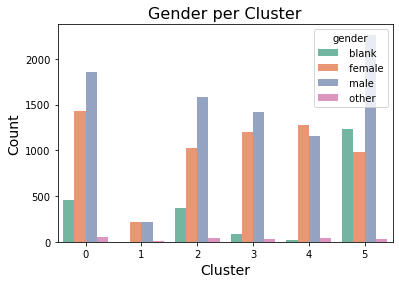

In [110]:
sns.countplot(data=final, hue='gender', x='cluster')
plt.title('Gender per Cluster', size = 16)
plt.xlabel('Cluster', size = 14)
plt.ylabel('Count', size = 14)
plt.savefig('./images/gender_cluster.png');

## Membership Length per Cluster

Segment 5 generally has more recent customer that joined the rewards program with Segment 3 being the customers with the longest membership length.

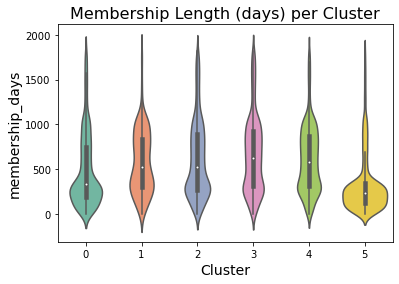

In [20]:
sns.violinplot(data=final, x='cluster', y='membership_days')
plt.title('Membership Length (days) per Cluster', size = 16)
plt.xlabel('Cluster', size = 14)
plt.ylabel('membership_days', size = 14)
plt.savefig('./images/membershipdays_cluster.png');

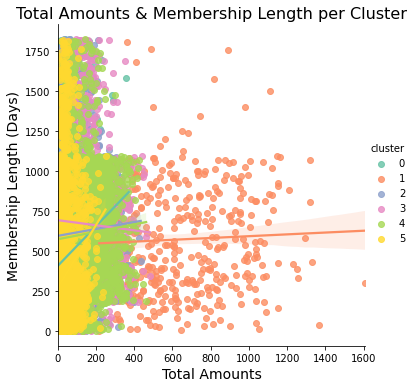

In [122]:
sns.lmplot(x='amt_overall', y='membership_days', hue='cluster', data=final)
plt.title('Total Amounts & Membership Length per Cluster', size = 16)
plt.xlabel('Total Amounts', size = 14)
plt.ylabel('Membership Length (Days)', size = 14);

In [131]:
final.groupby('cluster')['membership_days'].describe()

count        mean         std  min    25%    50%     75%     max
cluster                                                                   
0        3796.0  489.368019  414.126179  1.0  189.0  332.0  745.25  1823.0
1         441.0  573.176871  342.036582  1.0  298.0  527.0  832.00  1804.0
2        3022.0  616.774653  430.686828  1.0  272.0  520.0  896.00  1823.0
3        2732.0  670.005490  427.264641  1.0  309.0  625.0  930.00  1824.0
4        2488.0  613.080788  371.819484  1.0  309.0  575.0  867.00  1821.0
5        4515.0  327.861130  328.237977  1.0  121.0  235.0  349.00  1820.0

## Amount Spent with Number of Transactions per Cluster
All clusters seem fairly similar except for Cluster 1 which appears to have outliers that stand out with the highest amount spent per transaction overall. Cluster 0 generally had more numbers of transactions during non promos compared with promotions which also stood out.

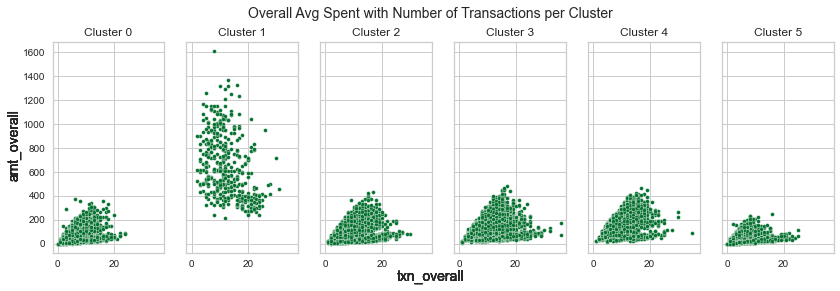

In [208]:
fig, ax = plt.subplots(1, 6, figsize=(14,4), sharey=True, sharex=True)

for i in range(0,6):
    sns.scatterplot(data=final.loc[final['cluster']==i], x='txn_overall', y='amt_overall', ax=ax[i], s=15)
    ax[i].set_title(f'Cluster {i}', size=12)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    fig.text(0.5, 0.03,'txn_overall', ha='center', size=14)
    fig.text(0.08, 0.5, 'amt_overall', va='center', rotation='vertical', size=14)
    fig.suptitle('Overall Avg Spent with Number of Transactions per Cluster', size=14)
    fig.subplots_adjust(top=0.86)

In [209]:
final.groupby('cluster')['amt_overall','txn_overall'].describe()

amt_overall                                                     \
              count        mean         std     min       25%      50%   
cluster                                                                  
0            3796.0   65.514486   59.280983    0.00   17.2500   46.245   
1             441.0  635.914331  262.466891  217.23  408.1100  596.810   
2            3022.0   97.852449   74.241536    0.97   34.4925   78.855   
3            2732.0  149.761907   82.450591    9.62   81.9400  140.990   
4            2488.0  165.943006   76.042619   13.98  109.5075  157.590   
5            4515.0   28.426206   32.297145    0.00    9.1650   18.100   

                           txn_overall                                       \
              75%      max       count       mean       std  min  25%   50%   
cluster                                                                       
0        101.0375   372.07      3796.0   6.082455  3.723769  0.0  3.0   5.0   
1        823.3200  1608.69       441.0  12.861678  5.981137  2.0  8.0  12.0   
2        145.9625   434.30      3022.0   9.997353  4.797315  1.0  6.0   9.0   
3        202.5725   482.07      2732.0  11.323572  5.350066  1.0  7.0  11.0   
4        212.7800   462.55      2488.0  10.065113  4.537980  1.0  7.0   9.0   
5         33.2050   250.06      4515.0   5.311628  3.887158  0.0  3.0   5.0   

                     
          75%   max  
cluster              
0         8.0  24.0  
1        18.0  31.0  
2        13.0  30.0  
3        14.0  36.0  
4        13.0  35.0  
5         7.0  25.0

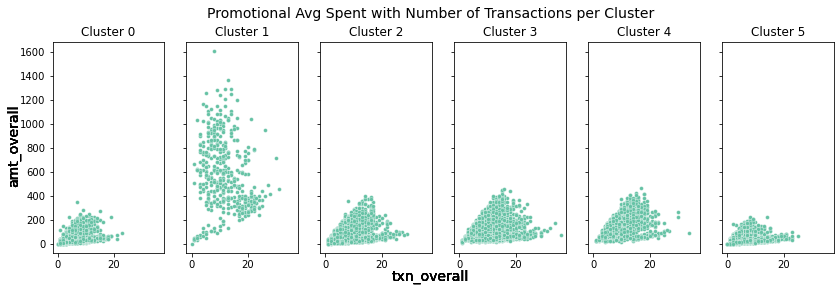

In [21]:
fig, ax = plt.subplots(1, 6, figsize=(14,4), sharey=True, sharex=True)

for i in range(0,6):
    sns.scatterplot(data=final.loc[final['cluster']==i], x='txn_promo', y='amt_promo', ax=ax[i], s=15)
    ax[i].set_title(f'Cluster {i}', size=12)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    fig.text(0.5, 0.03,'txn_overall', ha='center', size=14)
    fig.text(0.08, 0.5, 'amt_overall', va='center', rotation='vertical', size=14)
    fig.suptitle('Promotional Avg Spent with Number of Transactions per Cluster', size=14)
    fig.subplots_adjust(top=0.86)
plt.savefig('./images/promo_spent_clusters.png');

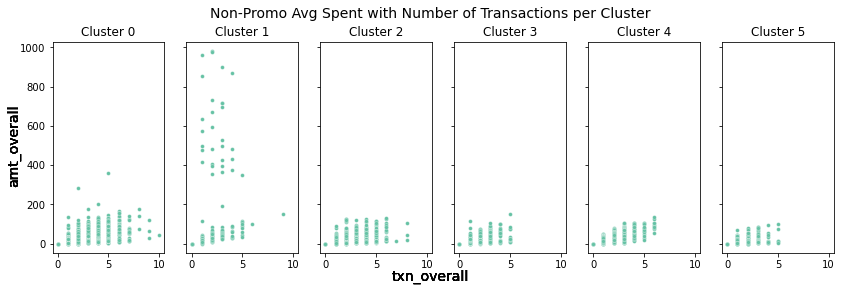

In [22]:
fig, ax = plt.subplots(1, 6, figsize=(14,4), sharey=True, sharex=True)

for i in range(0,6):
    sns.scatterplot(data=final.loc[final['cluster']==i], x='txn_nonpromo', y='amt_nonpromo', ax=ax[i], s=15)
    ax[i].set_title(f'Cluster {i}', size=12)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    fig.text(0.5, 0.03,'txn_overall', ha='center', size=14)
    fig.text(0.08, 0.5, 'amt_overall', va='center', rotation='vertical', size=14)
    fig.suptitle('Non-Promo Avg Spent with Number of Transactions per Cluster', size=14)
    fig.subplots_adjust(top=0.86)
plt.savefig('./images/nonpromo_spent_clusters.png');

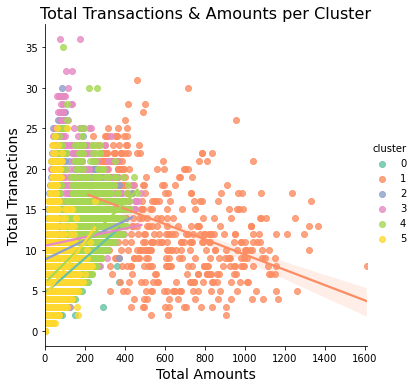

In [23]:
# Now showing the transactions and amts all overlaying for each cluster
sns.lmplot(x='amt_overall', y='txn_overall', hue='cluster', data=final)
plt.title('Total Transactions & Amounts per Cluster', size = 16)
plt.xlabel('Total Amounts', size = 14)
plt.ylabel('Total Tranactions', size = 14);

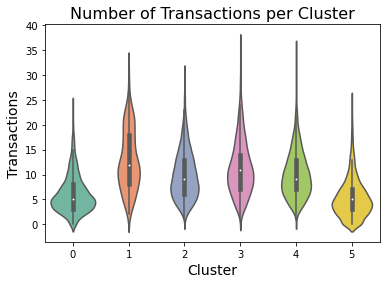

In [141]:
sns.violinplot(data=final, x='cluster', y='txn_overall')
plt.title('Number of Transactions per Cluster', size = 16)
plt.xlabel('Cluster', size = 14)
plt.ylabel('Transactions', size = 14)
plt.savefig('./images/txn_cluster.png');

## Offer Metrics per Cluster
Clusters 0 & 5 are slowest to respond to offers and least likely to redeem rewards. Cluster 4 likes BOGOs, Cluster 3 likes discount offers, and Cluster 3 likes informational offers. 


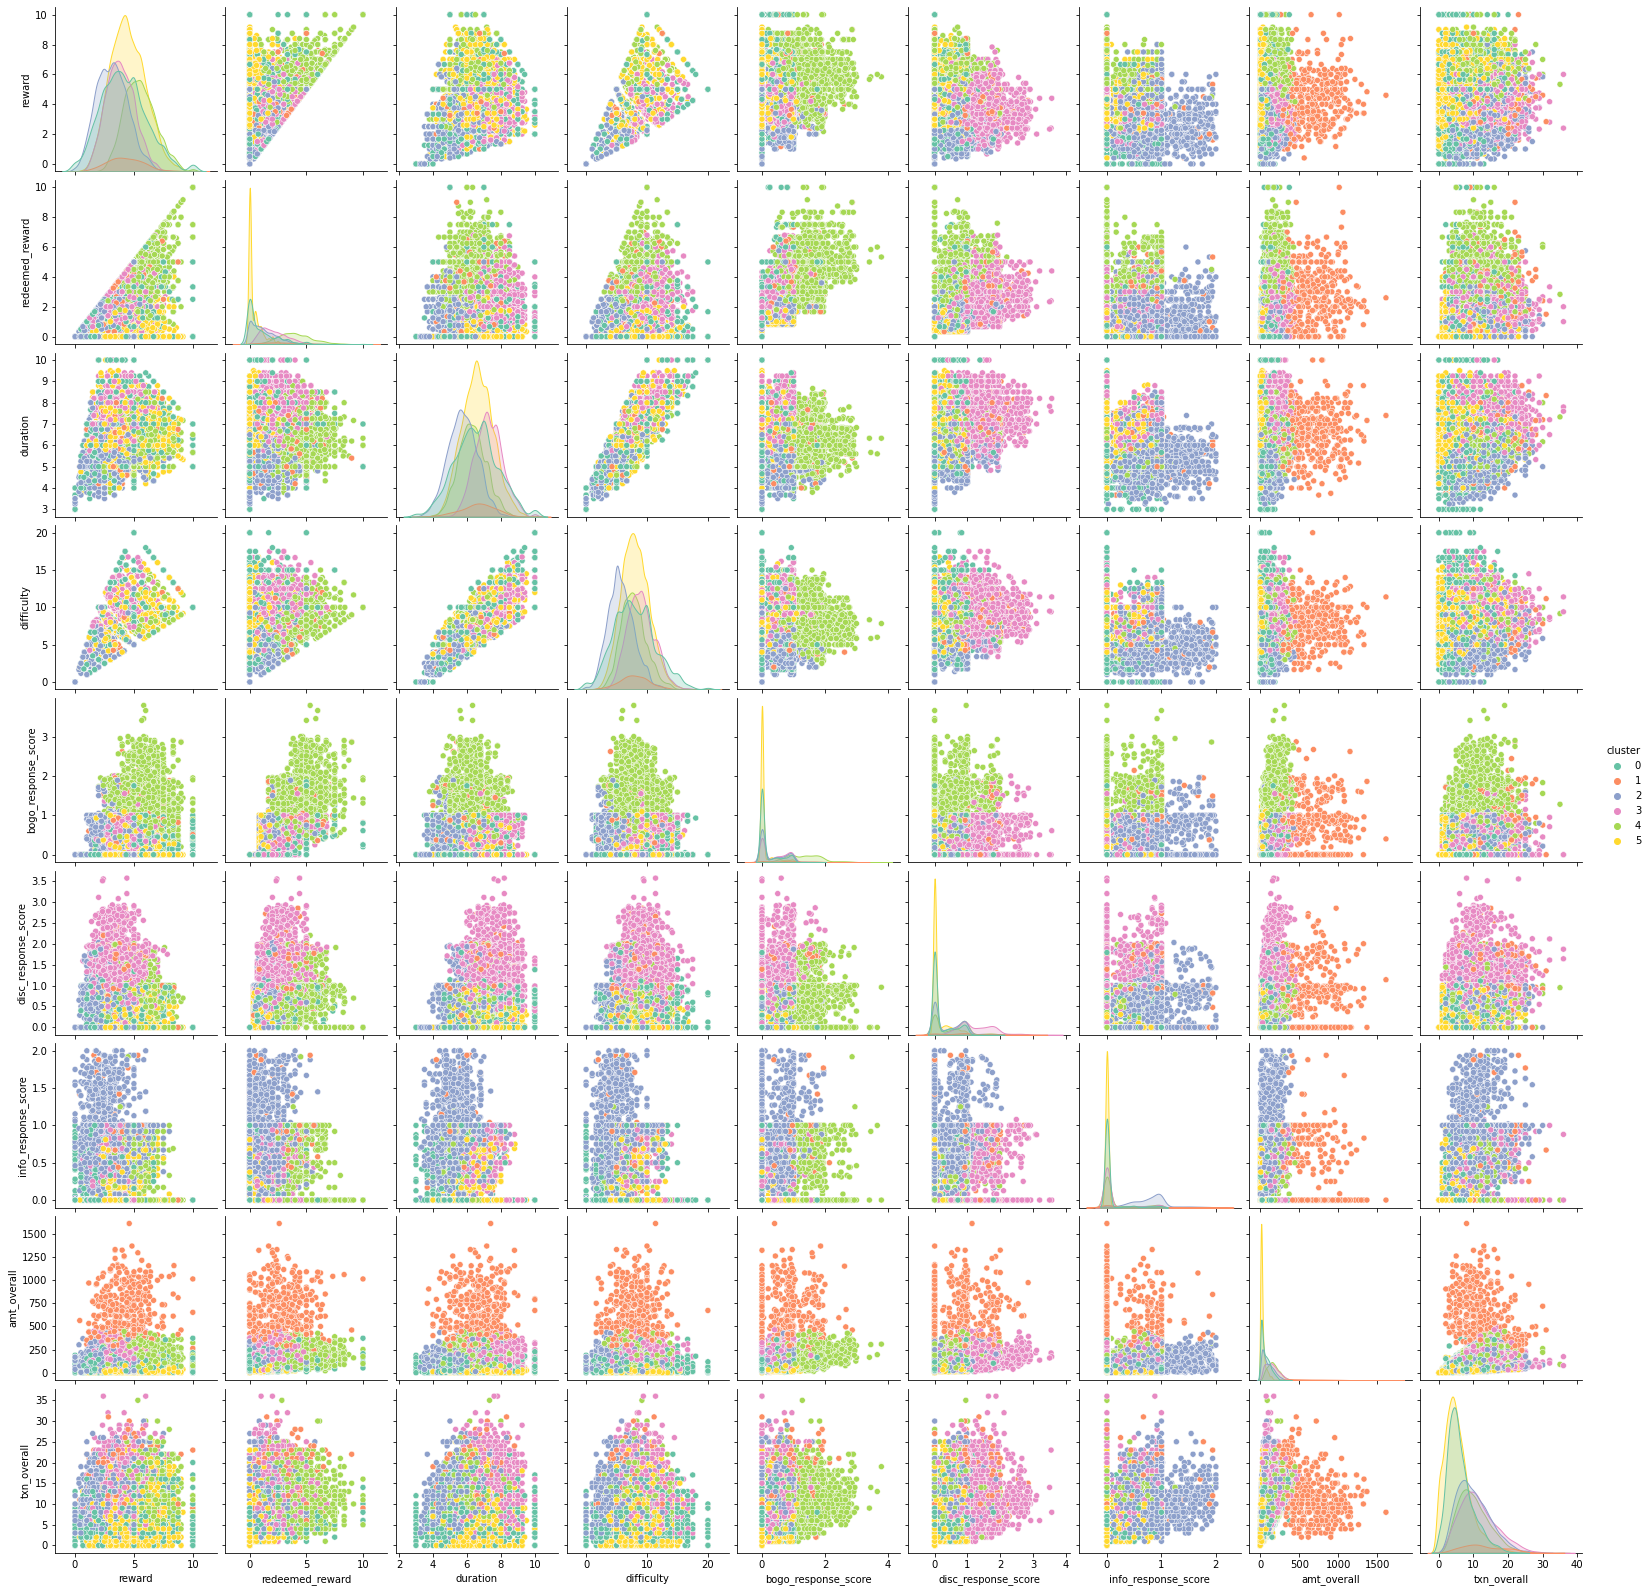

In [35]:
plot_cols = ['reward', 'redeemed_reward', 'duration', 'difficulty', 'bogo_response_score', 'disc_response_score',
             'info_response_score', 'amt_overall','txn_overall', 'cluster']
sns.pairplot(final[plot_cols], hue='cluster', palette="Set2");

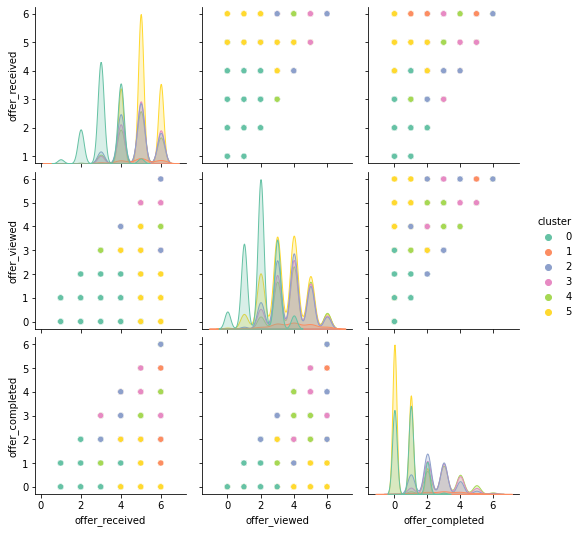

In [138]:
# Conversion rates from offer_received to offer_viewed & offer_completed
plot_cols = ['offer_received', 'offer_viewed', 'offer_completed', 'cluster']
sns.pairplot(final[plot_cols], hue='cluster', palette="Set2");

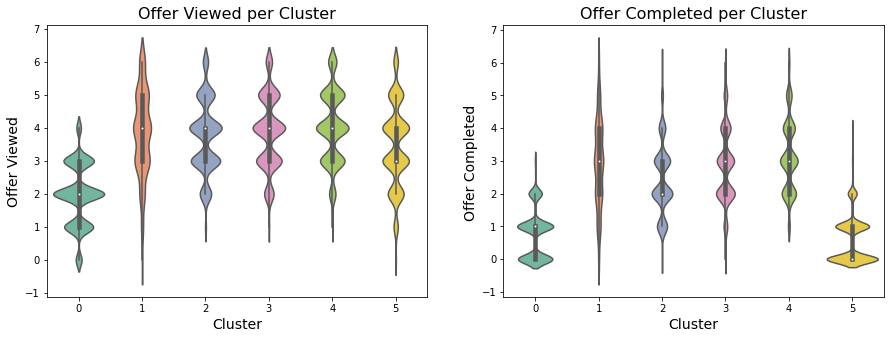

In [134]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.violinplot(data=final, x='cluster', y='offer_viewed', ax=ax1)
ax1.set_title('Offer Viewed per Cluster', size = 16)
ax1.set_xlabel('Cluster', size = 14)
ax1.set_ylabel('Offer Viewed', size = 14)

sns.violinplot(data=final, x='cluster', y='offer_completed', ax=ax2)
ax2.set_title('Offer Completed per Cluster', size = 16)
ax2.set_xlabel('Cluster', size = 14)
ax2.set_ylabel('Offer Completed ', size = 14)
plt.savefig('./images/offer_clusters.png');

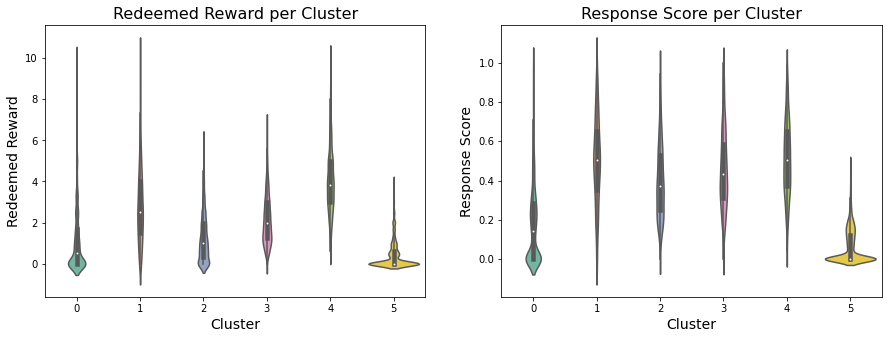

In [132]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.violinplot(data=final, x='cluster', y='redeemed_reward', ax=ax1)
ax1.set_title('Redeemed Reward per Cluster', size = 16)
ax1.set_xlabel('Cluster', size = 14)
ax1.set_ylabel('Redeemed Reward', size = 14)

sns.violinplot(data=final, x='cluster', y='response_score', ax=ax2)
ax2.set_title('Response Score per Cluster', size = 16)
ax2.set_xlabel('Cluster', size = 14)
ax2.set_ylabel('Response Score', size = 14)
plt.savefig('./images/reward_response_clusters.png');

In [135]:
final.groupby('cluster')['redeemed_reward','response_score', 'offer_viewed', 'offer_completed'].describe().T

cluster                          0           1            2            3  \
redeemed_reward count  3796.000000  441.000000  3022.000000  2732.000000   
                mean      1.014081    2.763568     1.190371     2.126208   
                std       1.427015    1.703100     1.098252     1.152420   
                min       0.000000    0.000000     0.000000     0.000000   
                25%       0.000000    1.500000     0.333333     1.250000   
                50%       0.500000    2.500000     1.000000     2.000000   
                75%       1.666667    4.000000     2.000000     3.000000   
                max      10.000000   10.000000     6.000000     6.800000   
response_score  count  3796.000000  441.000000  3022.000000  2732.000000   
                mean      0.178348    0.501294     0.398821     0.455082   
                std       0.206660    0.220210     0.190195     0.190676   
                min       0.000000    0.000000     0.000000     0.000000   
                25%       0.000000    0.350000     0.250000     0.310000   
                50%       0.142250    0.502500     0.373333     0.434500   
                75%       0.285000    0.654000     0.528000     0.586667   
                max       1.000000    1.000000     0.986667     1.000000   
offer_viewed    count  3796.000000  441.000000  3022.000000  2732.000000   
                mean      1.989726    3.863946     3.733620     3.877013   
                std       0.914039    1.255747     1.084720     1.083256   
                min       0.000000    0.000000     1.000000     1.000000   
                25%       1.000000    3.000000     3.000000     3.000000   
                50%       2.000000    4.000000     4.000000     4.000000   
                75%       3.000000    5.000000     4.000000     5.000000   
                max       4.000000    6.000000     6.000000     6.000000   
offer_completed count  3796.000000  441.000000  3022.000000  2732.000000   
                mean      0.761591    2.952381     2.463269     2.863836   
                std       0.730881    1.314257     1.055780     1.070791   
                min       0.000000    0.000000     0.000000     0.000000   
                25%       0.000000    2.000000     2.000000     2.000000   
                50%       1.000000    3.000000     2.000000     3.000000   
                75%       1.000000    4.000000     3.000000     4.000000   
                max       3.000000    6.000000     6.000000     6.000000   

cluster                          4            5  
redeemed_reward count  2488.000000  4515.000000  
                mean      4.009412     0.378032  
                std       1.484209     0.623860  
                min       0.600000     0.000000  
                25%       3.000000     0.000000  
                50%       3.833333     0.000000  
                75%       5.000000     0.600000  
                max      10.000000     4.000000  
response_score  count  2488.000000  4515.000000  
                mean      0.513797     0.061672  
                std       0.189658     0.083233  
                min       0.040000     0.000000  
                25%       0.372000     0.000000  
                50%       0.502667     0.000000  
                75%       0.650000     0.124500  
                max       0.990000     0.490000  
offer_viewed    count  2488.000000  4515.000000  
                mean      4.037781     3.481063  
                std       1.057732     1.228910  
                min       1.000000     0.000000  
                25%       3.000000     3.000000  
                50%       4.000000     3.000000  
                75%       5.000000     4.000000  
                max       6.000000     6.000000  
offer_completed count  2488.000000  4515.000000  
                mean      3.154743     0.556368  
                std       1.090114     0.673639  
                min       1.000000     0.000000  
                25%       2.000000     0.

# Customer Segment Summaries

## Segment 0
- Most valuable during nonpromos according to RFM score and higher RFM scores also during promos but not highest
- Cluster 0 generally had more numbers of transactions during non promos compared with promotions which also stood out.
- Least likely to view offers

## Segment 1
- Most valuable during promos according to RFM score
- Larger overall amounts spent
- Appears to be the outliers that stand out with the highest amount spent per transaction overall
- Lowest number of customers in this segment (2.6%)
- Higher incomes but not the highest

## Segment 2
- Higher response to informational offers
- Shorter durations, lower difficulty & lower reward offers unless they're informational

## Segment 3
- Higher response to discount offers
- Slim lead with higher number of overall transactions
- Lower RFM scores during nonpromos
- Customers with the longest membership lengths
- Higher incomes but not the highest

## Segment 4
- Lower number of overall transactions along with Cluster 5
- Higher response to bogo offers
- Higher RFM scores during promos but not highest
- Highest average (72,228) and median (71,500) incomes of all the clusters
- Highest average and median ages
- Only segment with more women than men
- Most likely to redeem rewards

## Segment 5
- More longer duration promos
- Lowest number of overall transactions
- Least valuable during both nonpromos and promos and in terms of RFM scores with a mean of 0.95 and 2.59 respectively
- More recent customers that joined the rewards program
- Lowest average and median incomes which correlates to their lower RFM scores, as well as the lowest average age and the fact that they're the most recent customers. 
- A lot of the people who left gender, income and age blank were in segment 5 - this segment is majority customers who identify as Male though.

In [40]:
final[final['cluster']==5].describe().T

count          mean           std      min        25%  \
txn_overall           4515.0      5.311628      3.887158      0.0      3.000   
amt_overall           4515.0     28.426206     32.297145      0.0      9.165   
txn_promo             4515.0      4.842082      3.773330      0.0      2.000   
amt_promo             4515.0     25.527382     30.263151      0.0      7.465   
txn_nonpromo          4515.0      0.469546      0.759603      0.0      0.000   
amt_nonpromo          4515.0      2.898824      7.972914      0.0      0.000   
membership_days       4515.0    327.861130    328.237977      1.0    121.000   
age                   4515.0     52.621705     17.699192     18.0     40.000   
income                4515.0  61546.622370  20747.447201  30000.0  45000.000   
gender_Blank          4515.0      0.273754      0.445934      0.0      0.000   
gender_F              4515.0      0.217497      0.412589      0.0      0.000   
gender_M              4515.0      0.501218      0.500054      0.0      0.000   
gender_O              4515.0      0.007530      0.086460      0.0      0.000   
offer_received        4515.0      5.009967      0.718536      3.0      5.000   
offer_viewed          4515.0      3.481063      1.228910      0.0      3.000   
offer_completed       4515.0      0.556368      0.673639      0.0      0.000   
web                   4515.0      4.124695      1.016566      0.0      3.000   
email                 4515.0      5.009967      0.718536      3.0      5.000   
mobile                4515.0      4.500111      0.885660      1.0      4.000   
social                4515.0      2.977630      1.147973      0.0      2.000   
difficulty            4515.0      8.032824      2.286850      1.4      6.400   
duration              4515.0      6.617719      0.914147      3.8      6.000   
reward                4515.0      4.471525      1.483512      0.4      3.400   
redeemed_reward       4515.0      0.378032      0.623860      0.0      0.000   
response_score        4515.0      0.061672      0.083233      0.0      0.000   
bogo_offer_received   4515.0      1.739313      0.821749      0.0      1.000   
disc_offer_received   4515.0      1.660244      0.836000      0.0      1.000   
info_offer_received   4515.0      0.672425      0.623445      0.0      0.000   
bogo_offer_viewed     4515.0      1.388058      0.801108      0.0      1.000   
disc_offer_viewed     4515.0      1.083828      0.791062      0.0      1.000   
info_offer_viewed     4515.0      0.352436      0.501781      0.0      0.000   
bogo_offer_completed  4515.0      0.137353      0.326644      0.0      0.000   
disc_offer_completed  4515.0      0.233463      0.411058      0.0      0.000   
info_offer_completed  4515.0      0.073939      0.248666      0.0      0.000   
bogo_response_score   4515.0      0.081720      0.216212      0.0      0.000   
disc_response_score   4515.0      0.124629      0.246525      0.0      0.000   
info_response_score   4515.0      0.039867      0.151269      0.0      0.000   
rfm_promo_score       4515.0      2.594921      1.256640      0.0      1.670   
rfm_nonpromo_score    4515.0      0.947652      1.440087      0.0      0.000   
amt_per_hour          4515.0      0.039827      0.045338      0.0      0.010   
amt_per_member_day    4515.0      0.311251      1.993824      0.0      0.030   
amt_per_income        4515.0      0.000000      0.000000      0.0      0.000   
cluster               4515.0      5.000000      0.000000      5.0      5.000   

                           50%         75%        max  
txn_overall               5.00      7.0000      25.00  
amt_overall              18.10     33.2050     250.06  
txn_promo                 4.00      7.0000      25.00  
amt_promo                16.21     29.6000     223.77  
txn_nonpromo              0.00      1.0000       5.00  
amt_nonpromo              0.00      1.8700     102.27  
membership_days         235.00    349.0000    1820.00  
age                      54.00     65.0000     100.00 

# Conclusions

This project highlighted that often times the bulk of a data science problem is the data cleaning and QC and how this can be a very iterative process in your workflow. Regardless of whatever analysis or algorithms you plan to perform on a dataset, the quality of the final analysis is largly dependant on the quality of the data that you are feeding in from the beginning (ie. garbage in, garbage out). This project was no different. After a first round of cleaning, there was more preprocessing needed in order to aggregate and merge everything to the final dataset where each row represents one Starbuck Rewards customer and their associated demographical information, transaction metrics, as well as offers received and if they were used. 

After cleaning and merging the data, StandardScaler and PCA transformations were then performed on the merged dataset which was then fed into a K-Means clustering algorithm after examining different clusters and eventually settling on using 6 clusters to represent each customer segment. With the labeled clusters, I was then able to do a post hoc analysis of each of the customer segments in order to figure out what makes them stand out with regards to their purchasing habits and behavior. These customer segment can now be used to make relevant business decisions and more targeted promotional offerings within the rewards program. 

There is longer term potential for this project to keep developing these customer segments and iterating through this workflow with even more customer data. There is also potential for future work to use these customer segments and implement A/B testing in order to validate some of our findings. 

Goals
Success Criteria / Key Metrics
Data
Overall Approach
Basic description of model
Findings
Risks/Limitations
Impact, next steps, conclusions